/home/david/.venvs/tikzplot/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


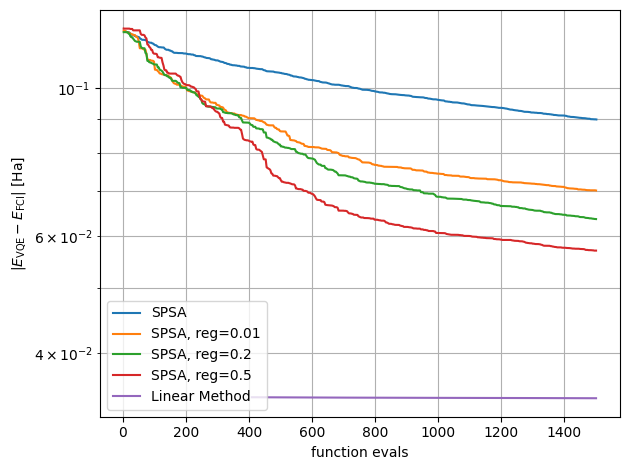

In [1]:
import numpy as np
import matplotlib.pyplot as plt

E_FCI = -108.701561742329  # Ha

methods = [
    {
        "label": "SPSA",
        "path": "../data/vqe/SPSA_n2.csv",
        "x_col": 1,   # nfev column in SPSA file
        "E_col": 2,   # energy column in SPSA file
        "skiprows": 1,
        "use": slice(None)
    },
    {
        "label": r"SPSA, reg=0.01",
        "path": "../data/vqe/SPSA_n2_reg0.01.csv",
        "x_col": 1,   # nfev column in SPSA file
        "E_col": 2,   # energy column in SPSA file
        "skiprows": 1,
        "use": slice(None)
    },
    {
        "label": r"SPSA, reg=0.2",
        "path": "../data/vqe/SPSA_n2_reg=0.2.csv",
        "x_col": 1,   
        "E_col": 2,   
        "skiprows": 1,
        "use": slice(0,500)
    },
    {
        "label": r"SPSA, reg=0.5",
        "path": "../data/vqe/SPSA_n2_reg=0.5.csv",
        "x_col": 1,  
        "E_col": 2,  
        "skiprows": 1,
        "use": slice(0,500)
    },
    {
        "label": "Linear Method",
        "path": "../data/vqe/LM_n2.csv",
        "x_col": 2,   
        "E_col": 3,   
        "skiprows": 1,
        "use": slice(60, 65)  
    },
]

series = []  
for m in methods:
    data = np.loadtxt(m["path"], delimiter=",", skiprows=m.get("skiprows", 0))
    nfev = data[:, m["x_col"]][m["use"]]
    E = data[:, m["E_col"]][m["use"]]
    E_best = np.minimum.accumulate(E)
    dE = np.abs(E_best - E_FCI)

    series.append((m["label"], nfev, dE, E_best))

plt.figure()
for label, nfev, dE, _ in series:
    plt.semilogy(nfev, dE, label=label)
plt.xlabel("function evals")
plt.ylabel(r"$|E_{\mathrm{VQE}} - E_{\mathrm{FCI}}|$ [Ha]")
plt.grid(True, which="both")
plt.tight_layout()
plt.legend()